# Data Analysis Maxims Rating (Flan-T5 XXL)

In [50]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Specify the path to the folder containing your CSV files
csv_folder_path = 'C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/results/rating'

# Change the working directory to the CSV folder
os.chdir(csv_folder_path)

# Now, you are in the specified directory, and you can work with your CSV files
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
print(csv_files)

['Maxims_results_Rating_appropriate_seed0.csv', 'Maxims_results_Rating_appropriate_seed1.csv', 'Maxims_results_Rating_appropriate_seed2.csv', 'Maxims_results_Rating_appropriate_seed3.csv', 'Maxims_results_Rating_appropriate_seed4.csv', 'Maxims_results_Rating_likely_seed0.csv', 'Maxims_results_Rating_likely_seed1.csv', 'Maxims_results_Rating_likely_seed2.csv', 'Maxims_results_Rating_likely_seed3.csv', 'Maxims_results_Rating_likely_seed4.csv', 'Maxims_results_Rating_plausible_seed0.csv', 'Maxims_results_Rating_plausible_seed1.csv', 'Maxims_results_Rating_plausible_seed2.csv', 'Maxims_results_Rating_plausible_seed3.csv', 'Maxims_results_Rating_plausible_seed4.csv', 'Maxims_results_Rating_possible_seed0.csv', 'Maxims_results_Rating_possible_seed1.csv', 'Maxims_results_Rating_possible_seed2.csv', 'Maxims_results_Rating_possible_seed3.csv', 'Maxims_results_Rating_possible_seed4.csv']


In [75]:
# Concatenate all csv files to one dataframe
dfs = []

for csv in csv_files:
    df = pd.read_csv(csv)
    dfs.append(df)

In [53]:
final_df = pd.concat(dfs, ignore_index=True)
display(final_df)

,phenomenon,item_number,prompt,true_answer_key,true_answer,scenarios,options,generation,generation_isvalid,distribution
0,appropriate,1,Task: You will read short stories that describ...,3,He disliked the talk that his boss gave but do...,"Bob is having a lunch meeting with his boss, M...",['He is excited about the upcoming trip to Jap...,very appropriate,True,"{'very inappropriate': 0.003364734351663549, '..."
1,appropriate,2,Task: You will read short stories that describ...,2,Alex thinks that Richard's painting is mediocre.,"Richard came to visit his friend, Alex. Alex i...",['Alex is proud of the painting job that he di...,very appropriate,True,"{'very inappropriate': 0.0039305212861535516, ..."
2,appropriate,3,Task: You will read short stories that describ...,2,She does not want to discuss the topic that Le...,Leslie and Jane are chatting at a coffee shop....,['She thinks that it is the best latte in the ...,very appropriate,True,"{'very inappropriate': 0.018914268709052297, '..."
3,appropriate,4,Task: You will read short stories that describ...,2,He pretends that he did not understand his wif...,Kelsey is in a bad mood. Every minor thing irr...,['He is thankful for her offer of beer and chi...,very appropriate,True,"{'very inappropriate': 0.051285894018559666, '..."
4,appropriate,5,Task: You will read short stories that describ...,2,Mark's opinion of Jane as a financial manager ...,"Mark is discussing Jane, a senior financial ma...","[""Mark's opinion of Jane as a financial manage...",very appropriate,True,"{'very inappropriate': 0.10636146599589356, 'i..."
...,...,...,...,...,...,...,...,...,...,...
395,possible,16,Task: You will read short stories that describ...,2,Freddie will never give Berta any money.,Berta often forgets to return money that she b...,['Freddie can give Berta some money that he wi...,very impossible,True,"{'very impossible': 0.24495090229446675, 'impo..."
396,possible,17,Task: You will read short stories that describ...,2,Katy doubts that Mr. Smith is a smart individual.,Lars and Katy are discussing their CEO. Lars s...,['Katy agrees that Mr. Smith is a smart indivi...,very possible,True,"{'very impossible': 0.004628364040041075, 'imp..."
397,possible,18,Task: You will read short stories that describ...,3,Samantha's dad thinks that Samantha has an inc...,Samantha is talking with her dad about her fia...,"[""Samantha's dad thinks that Samantha's fiance...",very possible,True,"{'very impossible': 0.004987227333051218, 'imp..."
398,possible,19,Task: You will read short stories that describ...,2,Bianka does not want Lenny to know her address.,Lenny is saying goodbye to his date Bianka. Le...,"['Bianka is an alien.', 'Bianka does not want ...",very possible,True,"{'very impossible': 0.006292682873801374, 'imp..."


# Analyse Data

In [54]:
original_df = pd.DataFrame(final_df)

# Define a list to store the dataframes for each phenomenon
phenomenon_dataframes = []

# List of unique phenomena
unique_phenomena = original_df['phenomenon'].unique()

# Loop through each unique phenomenon and create a dataframe
for phenomenon in unique_phenomena:
    # Filter the dataframe for the current phenomenon
    filtered_df = original_df[original_df['phenomenon'] == phenomenon]
    
    # Create a pivot table to count the values for the current phenomenon
    pivot_table = pd.pivot_table(filtered_df, index='phenomenon', columns='generation', aggfunc='size', fill_value=0)
    
    # Reset the index and rename columns for clarity
    pivot_table = pivot_table.reset_index()
    pivot_table.columns.name = None
    pivot_table = pivot_table.rename_axis(columns={'phenomenon': 'Phenomenon'})
    
    # Append the dataframe to the list
    phenomenon_dataframes.append(pivot_table)

# Now, you have a list of dataframes, each containing the counts for a specific phenomenon
# You can access them using phenomenon_dataframes[0], phenomenon_dataframes[1], etc.

# Example: Display the dataframe for all phenomena in a for loop
for i in range(4):
    display(phenomenon_dataframes[i])

,phenomenon,very appropriate
0,appropriate,100


,phenomenon,very likely,very unlikely
0,likely,85,15


,phenomenon,plausible,very,very plausible
0,plausible,30,5,65


,phenomenon,very impossible,very possible
0,possible,5,95


In [55]:
# Create an empty DataFrame for the counts of "appropriate"
apr_df = pd.DataFrame(columns=["phenomenon", "very inappropriate", "inappropriate", "neutral", "appropriate", "very appropriate"])

# Set the first column "phenomenon" to "appropriate"
apr_df["phenomenon"] = ["appropriate"]

# Define the categories
categories = ["very inappropriate", "inappropriate", "neutral", "appropriate", "very appropriate"]

# Initialize counts to zero
counts = {category: 0 for category in categories}

# Iterate through the "generation" column of final_df
for value in final_df["generation"]:
    if value in counts:
        counts[value] += 1

# Update the counts in the new DataFrame
for category in categories:
    apr_df.at[0, category] = counts[category]

# Display the new DataFrame
#print(apr_df)
display(apr_df)

,phenomenon,very inappropriate,inappropriate,neutral,appropriate,very appropriate
0,appropriate,0,0,0,0,100


In [56]:
# Create an empty DataFrame for the counts of "likely"
lky_df = pd.DataFrame(columns=["phenomenon", "very unlikely","unlikely","neutral","likely","very likely"])

# Set the first column "phenomenon" to "likely"
lky_df["phenomenon"] = ["likely"]

# Define the categories
categories = ["very unlikely","unlikely","neutral","likely","very likely"]

# Initialize counts to zero
counts = {category: 0 for category in categories}

# Iterate through the "generation" column of final_df
for value in final_df["generation"]:
    if value in counts:
        counts[value] += 1

# Update the counts in the new DataFrame
for category in categories:
    lky_df.at[0, category] = counts[category]

# Display the new DataFrame
display(lky_df)

,phenomenon,very unlikely,unlikely,neutral,likely,very likely
0,likely,15,0,0,0,85


In [57]:
# Create an empty DataFrame for the counts of "plausible"
pls_df = pd.DataFrame(columns=["phenomenon", "very implausible","implausible","neutral","plausible","very plausible"])

# Set the first column "phenomenon" to "plausible"
pls_df["phenomenon"] = ["plausible"]

# Define the categories
categories = ["very implausible","implausible","neutral","plausible","very plausible"]

# Initialize counts to zero
counts = {category: 0 for category in categories}

# Iterate through the "generation" column of final_df
for value in final_df["generation"]:
    if value in counts:
        counts[value] += 1

# Update the counts in the new DataFrame
for category in categories:
    pls_df.at[0, category] = counts[category]

# Display the new DataFrame
display(pls_df)

,phenomenon,very implausible,implausible,neutral,plausible,very plausible
0,plausible,0,0,0,30,65


In [58]:
# Create an empty DataFrame for the counts of "possible"
pos_df = pd.DataFrame(columns=["phenomenon", "very impossible","impossible","neutral","possible","very possible"])

# Set the first column "phenomenon" to "possible"
pos_df["phenomenon"] = ["possible"]

# Define the categories
categories = ["very impossible","impossible","neutral","possible","very possible"]

# Initialize counts to zero
counts = {category: 0 for category in categories}

# Iterate through the "generation" column of final_df
for value in final_df["generation"]:
    if value in counts:
        counts[value] += 1

# Update the counts in the new DataFrame
for category in categories:
    pos_df.at[0, category] = counts[category]

# Display the new DataFrame
display(pos_df)

,phenomenon,very impossible,impossible,neutral,possible,very possible
0,possible,5,0,0,0,95


## Create a Plot

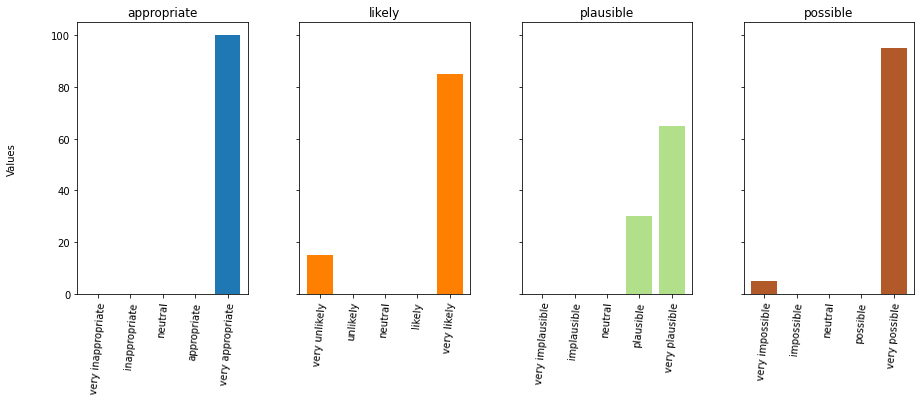

In [74]:
# Create a figure with 1 row and 4 columns for subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

# List of dataframes
dataframes = [apr_df, lky_df, pls_df, pos_df]

# Colors for the bars
paired = sns.color_palette("Paired")
colors = [paired[1], paired[7], paired[2], paired[11]]

for i, df in enumerate(dataframes):
    ax = axs[i]
    categories = df.columns[1:]
    values = df.iloc[0, 1:]
    x = np.arange(len(categories))

    # Plot bars
    ax.bar(x, values, color=colors[i])
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=85)
    ax.set_title(df.iloc[0, 0])

# Add a shared y-axis label
fig.text(0.06, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.3)

# Save the plot as a file 
# plot_filename = 'C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/analysis/figures/answercounts_rating.pdf'
# plt.savefig(plot_filename, bbox_inches='tight')

# Show the plot
plt.show()